Libs: ( need to add all libs required later)

In [12]:
!pip install scapy
!pip install pandas


Capture Packets:

In [13]:
from scapy.all import sniff, IP, TCP, UDP, ICMP
import pandas as pd
import time

# List to store captured packets
packet_list = []

def packet_handler(packet):
    if packet.haslayer(IP):  # Only process IP packets
        packet_data = {
            "timestamp": time.time(),
            "src_ip": packet[IP].src,
            "dst_ip": packet[IP].dst,
            "src_port": packet[TCP].sport if packet.haslayer(TCP) else (packet[UDP].sport if packet.haslayer(UDP) else None),
            "dst_port": packet[TCP].dport if packet.haslayer(TCP) else (packet[UDP].dport if packet.haslayer(UDP) else None),
            "protocol": "TCP" if packet.haslayer(TCP) else "UDP" if packet.haslayer(UDP) else "ICMP" if packet.haslayer(ICMP) else "Other",
            "packet_size": len(packet)
        }
        packet_list.append(packet_data)
        print(f"Captured Packet: {packet_data}")  # Print captured packet info

# Capture a defined number of packets for testing (adjust count as needed)
sniff(filter="ip", prn=packet_handler, count=500)

# Convert captured packets to DataFrame
df = pd.DataFrame(packet_list)

# Save to CSV for analysis
df.to_csv("network_traffic.csv", index=False)
print("✅ Packet capture complete! Data saved to network_traffic.csv")


Captured Packet: {'timestamp': 1739266386.088809, 'src_ip': '192.168.2.1', 'dst_ip': '192.168.2.255', 'src_port': 9431, 'dst_port': 9431, 'protocol': 'UDP', 'packet_size': 104}
Captured Packet: {'timestamp': 1739266387.0124218, 'src_ip': '192.168.2.10', 'dst_ip': '224.0.0.251', 'src_port': 5353, 'dst_port': 5353, 'protocol': 'UDP', 'packet_size': 100}
Captured Packet: {'timestamp': 1739266387.0467699, 'src_ip': '192.168.2.12', 'dst_ip': '192.168.2.10', 'src_port': 5353, 'dst_port': 5353, 'protocol': 'UDP', 'packet_size': 396}
Captured Packet: {'timestamp': 1739266387.1258082, 'src_ip': '192.168.2.12', 'dst_ip': '140.82.113.21', 'src_port': 50370, 'dst_port': 443, 'protocol': 'TCP', 'packet_size': 1490}
Captured Packet: {'timestamp': 1739266387.126295, 'src_ip': '192.168.2.12', 'dst_ip': '140.82.113.21', 'src_port': 50370, 'dst_port': 443, 'protocol': 'TCP', 'packet_size': 1490}
Captured Packet: {'timestamp': 1739266387.126674, 'src_ip': '192.168.2.12', 'dst_ip': '140.82.113.21', 'src_p

Read Packets:

In [14]:
import pandas as pd

# Load the CSV
df = pd.read_csv("network_traffic.csv")

# Convert UNIX timestamp (float) to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Localize to UTC first, then convert to Atlantic Time (Halifax)
df["timestamp"] = df["timestamp"].dt.tz_localize("UTC").dt.tz_convert("America/Halifax")

# Show the corrected timestamps
print(df.head())


                            timestamp        src_ip         dst_ip  src_port  \
0 2025-02-11 05:33:06.088808960-04:00   192.168.2.1  192.168.2.255      9431   
1 2025-02-11 05:33:07.012421888-04:00  192.168.2.10    224.0.0.251      5353   
2 2025-02-11 05:33:07.046770176-04:00  192.168.2.12   192.168.2.10      5353   
3 2025-02-11 05:33:07.125808128-04:00  192.168.2.12  140.82.113.21     50370   
4 2025-02-11 05:33:07.126295040-04:00  192.168.2.12  140.82.113.21     50370   

   dst_port protocol  packet_size  
0      9431      UDP          104  
1      5353      UDP          100  
2      5353      UDP          396  
3       443      TCP         1490  
4       443      TCP         1490  


Packet Size Over Time (Line Plot)

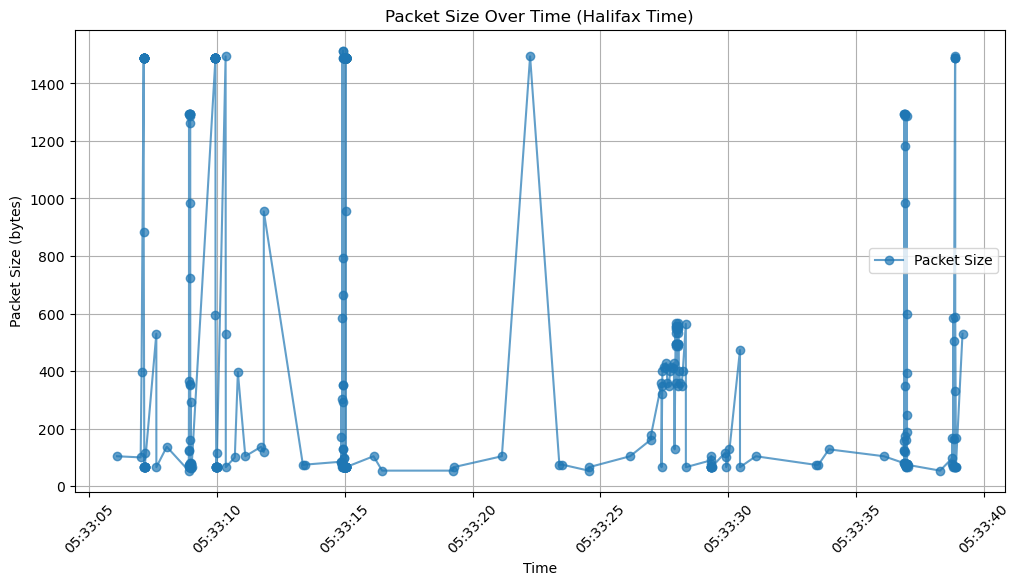

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["timestamp"], df["packet_size"], marker="o", linestyle="-", alpha=0.7, label="Packet Size")
plt.xlabel("Time")
plt.ylabel("Packet Size (bytes)")
plt.title("Packet Size Over Time (Halifax Time)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Top 10 Most Active Source IPs (Bar Chart)

/Users/martinward/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


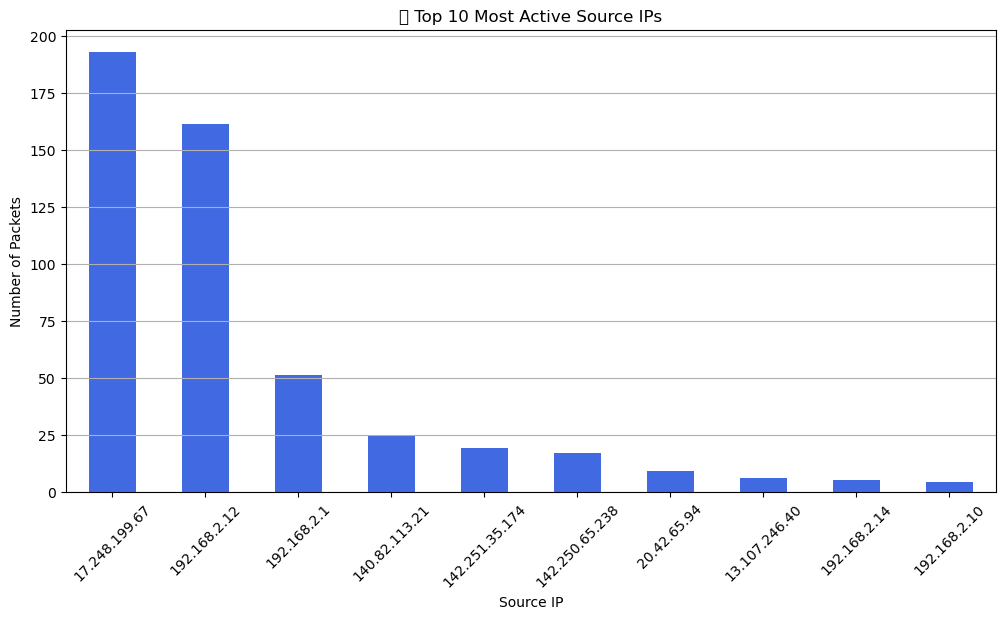

In [17]:
top_src_ips = df["src_ip"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_src_ips.plot(kind="bar", color="royalblue")

plt.xlabel("Source IP")
plt.ylabel("Number of Packets")
plt.title("📊 Top 10 Most Active Source IPs")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.show()


Protocol Distribution (Pie Chart)

/Users/martinward/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


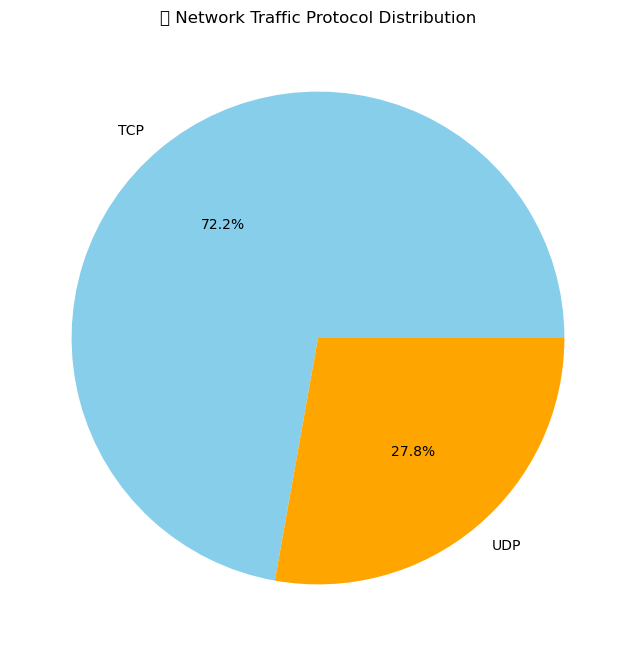

In [18]:
protocol_counts = df["protocol"].value_counts()

plt.figure(figsize=(8, 8))
protocol_counts.plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "orange", "lightcoral"])

plt.title("📊 Network Traffic Protocol Distribution")
plt.ylabel("")  # Hide y-axis label

plt.show()


Packet Size Distribution (Histogram)

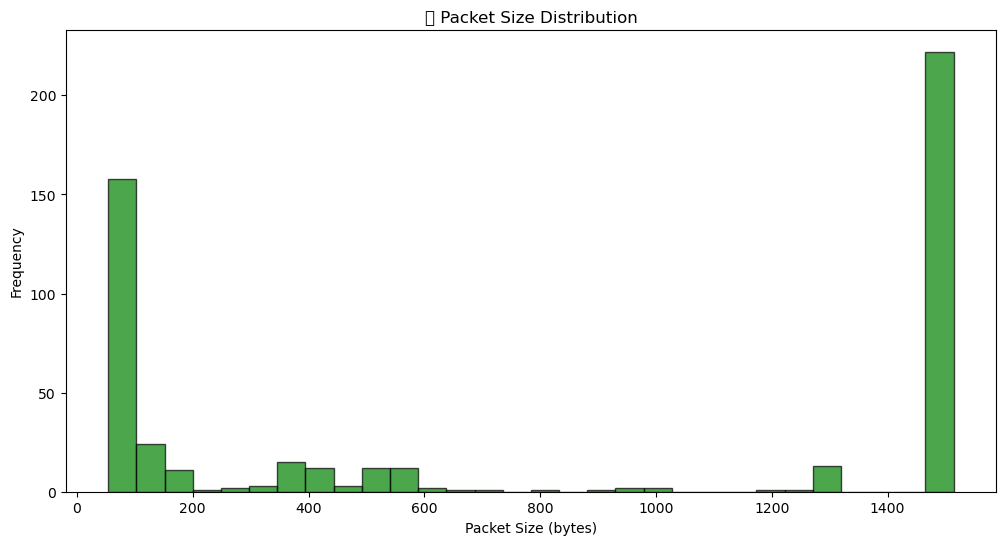

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(df["packet_size"], bins=30, color="green", edgecolor="black", alpha=0.7)

plt.xlabel("Packet Size (bytes)")
plt.ylabel("Frequency")
plt.title("📊 Packet Size Distribution")

plt.show()


Heatmap of Source vs. Destination IPs (Seaborn and pure matplotlib)

/Users/martinward/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


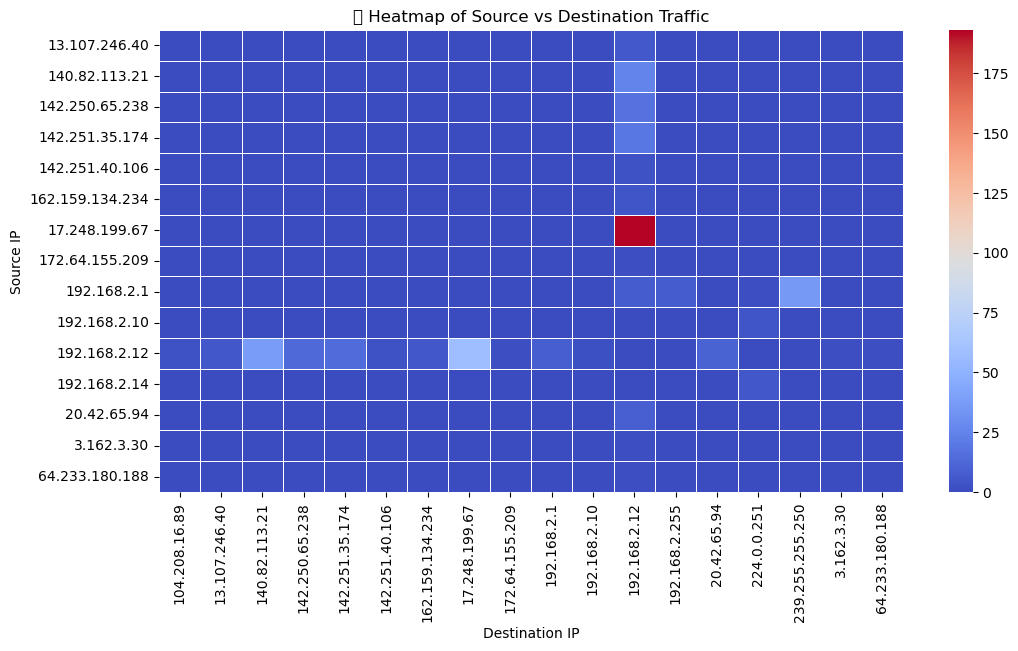

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index="src_ip", columns="dst_ip", aggfunc="size", fill_value=0)

sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)

plt.xlabel("Destination IP")
plt.ylabel("Source IP")
plt.title("📊 Heatmap of Source vs Destination Traffic")

plt.show()


/Users/martinward/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


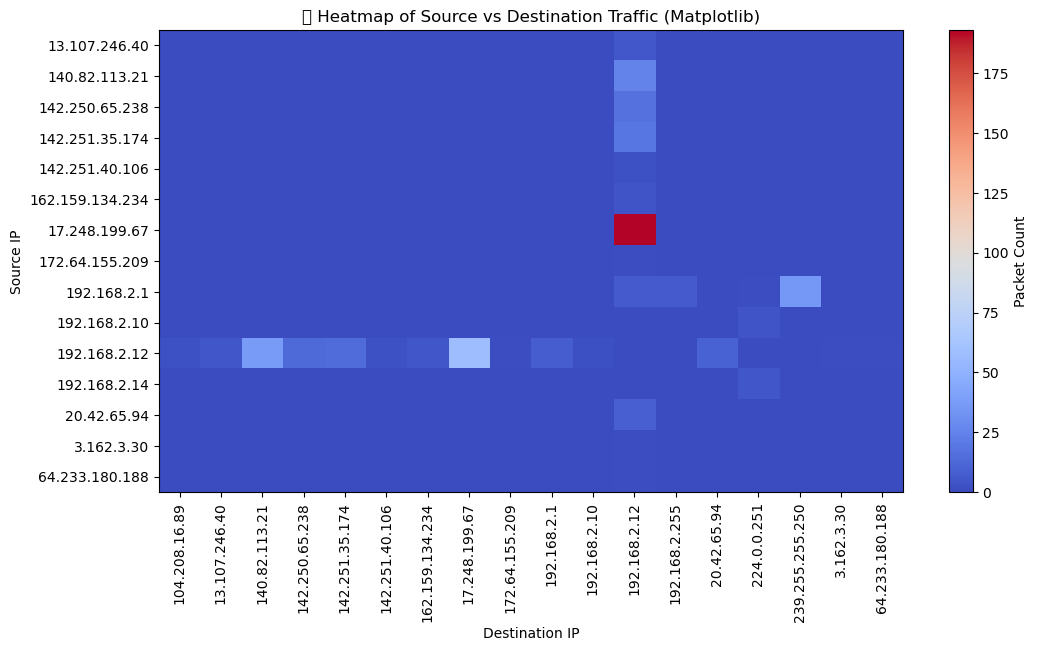

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create a pivot table for source vs destination IP packet counts
pivot_table = df.pivot_table(index="src_ip", columns="dst_ip", aggfunc="size", fill_value=0)

# Convert to NumPy array for plotting
heatmap_data = pivot_table.values

# Create the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_data, cmap="coolwarm", aspect="auto")

# Add labels
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel("Destination IP")
plt.ylabel("Source IP")
plt.title("📊 Heatmap of Source vs Destination Traffic (Matplotlib)")

plt.colorbar(label="Packet Count")
plt.show()
